In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv('./data/clean/halving_02_to_04.csv')

In [69]:
data['date'] = pd.to_datetime(data['date'])

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92282 entries, 0 to 92281
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                92282 non-null  object        
 1   symbol              92282 non-null  object        
 2   date                92282 non-null  datetime64[ns]
 3   rank                92282 non-null  float64       
 4   market_cap          92282 non-null  float64       
 5   price               92282 non-null  float64       
 6   circulating_supply  92282 non-null  float64       
 7   volume_24h          92282 non-null  float64       
 8   %1h                 92282 non-null  float64       
 9   %7h                 92282 non-null  float64       
 10  %24h                92282 non-null  float64       
 11  class               92282 non-null  float64       
 12  ismultiplatform     92282 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
m

In [71]:
data.head()

,name,symbol,date,rank,market_cap,price,circulating_supply,volume_24h,%1h,%7h,%24h,class,ismultiplatform
0,Bitcoin,BTC,2016-07-10,-1.344634,1.128958,0.351651,-0.066697,0.035421,-0.002128,-0.040551,-0.069267,4.0,1.0
1,Ethereum,ETH,2016-07-10,-1.343051,0.071937,-0.040338,-0.062407,-0.033380,0.038748,-0.029452,-0.097650,4.0,1.0
2,XRP,XRP,2016-07-10,-1.341469,-0.002847,-0.047057,2.225967,-0.036860,-0.000614,-0.033740,-0.071222,4.0,1.0
3,Litecoin,LTC,2016-07-10,-1.339886,-0.007928,-0.044544,-0.064695,-0.035110,-0.006670,-0.047613,-0.082599,4.0,0.0
4,The,DAO,2016-07-10,-1.338304,-0.016555,-0.047000,0.007156,-0.036827,0.009984,-0.020246,0.002194,4.0,1.0


In [72]:
data.drop(columns=['name'], inplace=True)

In [73]:
data['year'] = data['date'].dt.year
data['year_group'] = (data['year'] // 4) * 4


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92282 entries, 0 to 92281
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   symbol              92282 non-null  object        
 1   date                92282 non-null  datetime64[ns]
 2   rank                92282 non-null  float64       
 3   market_cap          92282 non-null  float64       
 4   price               92282 non-null  float64       
 5   circulating_supply  92282 non-null  float64       
 6   volume_24h          92282 non-null  float64       
 7   %1h                 92282 non-null  float64       
 8   %7h                 92282 non-null  float64       
 9   %24h                92282 non-null  float64       
 10  class               92282 non-null  float64       
 11  ismultiplatform     92282 non-null  float64       
 12  year                92282 non-null  int32         
 13  year_group          92282 non-null  int32     

In [75]:
from scipy.stats import kurtosis, skew, shapiro
from statsmodels.stats.stattools import durbin_watson
def calculate_features(group):
    group = group.sort_values(by='date')

    if len(group) < 3:
        return pd.Series({
            'market_cap_mean': np.nan,
            'price_mean': np.nan,
            'circulating_supply_mean': np.nan,
            'volume_24h_mean': np.nan,
            '%1h_mean': np.nan,
            '%7h_mean': np.nan,
            '%24h_mean': np.nan,
            'rank_mean': np.nan,
            'class': np.nan,
            'ismultiplatform': np.nan,
            'price_volatility': np.nan,
            'daily_return_mean': np.nan,
            
            'price_normality_pvalue': np.nan,
            'price_autocorrelation': np.nan
        })

    returns = group['price'].pct_change().dropna()


    features = {
        'market_cap_mean': group['market_cap'].mean(),
        'price_mean': group['price'].mean(),
        'circulating_supply_mean': group['circulating_supply'].mean(),
        'volume_24h_mean': group['volume_24h'].mean(),

        '%1h_mean': group['%1h'].mean(),
        '%7h_mean': group['%7h'].mean(),
        '%24h_mean': group['%24h'].mean(),
        'rank_mean': group['rank'].mean(),
        'class': group['class'].iloc[0],
        'ismultiplatform': group['ismultiplatform'].iloc[0],

        'price_volatility': returns.std(),
        'daily_return_mean': returns.mean(),

        
        'price_normality_pvalue': shapiro(group['price'])[1],
        'price_autocorrelation': durbin_watson(group['price'] - group['price'].mean())
    }
    return pd.Series(features)


grouped_data = data.groupby(['year_group', 'symbol'])
features_data = grouped_data.apply(calculate_features).reset_index()
features_data.head()

c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
C:\Users\Joseph\AppData\Local\Temp\ipykernel_26340\3050554295.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features_data = grouped_data.apply(calculate_features).reset_index()


,year_group,symbol,market_cap_mean,price_mean,circulating_supply_mean,volume_24h_mean,%1h_mean,%7h_mean,%24h_mean,rank_mean,class,ismultiplatform,price_volatility,daily_return_mean,price_normality_pvalue,price_autocorrelation
0,2016,$$$,-0.029565,-0.047061,-0.064741,-0.037264,-0.130638,0.003046,-0.006186,-0.527783,4.0,0.0,1.359147e-07,-1.223350e-08,0.001708,0.566545
1,2016,020,-0.029564,-0.047061,9.775591,-0.037264,-0.192503,0.336214,-0.016526,-0.773828,4.0,0.0,5.862786e-10,-3.010839e-11,0.000190,1.775573
2,2016,1337,-0.029561,-0.047061,0.767388,-0.037264,-0.100851,-0.067596,-0.026568,-0.863741,4.0,0.0,3.026959e-08,3.593222e-09,0.000135,0.557722
3,2016,1CR,-0.029555,-0.046119,-0.067715,-0.037243,-0.149120,0.383548,-0.011370,-0.969894,4.0,0.0,1.681276e-02,2.555851e-04,0.000051,0.501116
4,2016,1ST,-0.028679,-0.047005,-0.062167,-0.037224,0.053130,0.003086,0.022039,-1.285940,4.0,0.0,3.532797e-04,-1.537993e-04,0.000202,0.733459


In [76]:
features_data.dropna(inplace=True)

In [77]:
features_data['class'] = features_data['class'].map({0.0: 0, 4.0: 1})

In [78]:
features_data['class'].value_counts()

class
1    4098
0       1
Name: count, dtype: int64

In [79]:
features_data.drop(columns=['class'], inplace=True)

In [80]:
def calculate_target(data):
    condition = (
        (data['market_cap_mean'] * (1 + data['price_mean'] / 100) > data['market_cap_mean']) &
        (data['price_volatility'] > 0.1) 
    )
    
    data['target'] = condition.astype(int)
    
    data['target'] = data['target']
    
    return data

In [81]:
data_with_target = calculate_target(features_data)

In [82]:
data_with_target['year_group'].value_counts()

year_group
2020    3409
2016     685
2024       5
Name: count, dtype: int64

In [83]:
data_with_target.groupby('target').size()

target
0    4026
1      73
dtype: int64

In [84]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [85]:
X = data_with_target.drop(columns=['symbol', 'year_group', 'target','price_volatility' ])
y = data_with_target['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=5)
selector.fit(X_train, y_train)
print(X_train.columns[selector.get_support()])

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Index(['market_cap_mean', 'price_mean', 'volume_24h_mean', 'rank_mean',
       'daily_return_mean'],
      dtype='object')


In [86]:
smote = SMOTE(random_state=42)
X_train_selected, y_train = smote.fit_resample(X_train_selected, y_train)

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'VotingClassifier': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ], voting='hard')

}  

In [87]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
results = {}
for model_name, model in models.items():
    cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy')
    results[model_name] = cv_results.mean()
    print(f'{model_name}: {cv_results.mean()}')


RandomForest: 0.9911667537333597
GradientBoosting: 0.9877571019400861


c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

AdaBoost: 0.9817125117840264
SVM: 0.6447611670539634
LogisticRegression: 0.6246129735377298


c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

VotingClassifier: 0.9899268039318118


c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [88]:
results = pd.Series(results).sort_values(ascending=False)
results

RandomForest          0.991167
VotingClassifier      0.989927
GradientBoosting      0.987757
AdaBoost              0.981713
SVM                   0.644761
LogisticRegression    0.624613
dtype: float64

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_selected, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
913 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Joseph\Desktop\TP-ML\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=9,
                       min_samples_split=6, n_estimators=300, random_state=42)

In [90]:
best_rf.score(X_test_selected, y_test)

0.9780487804878049

<Axes: >

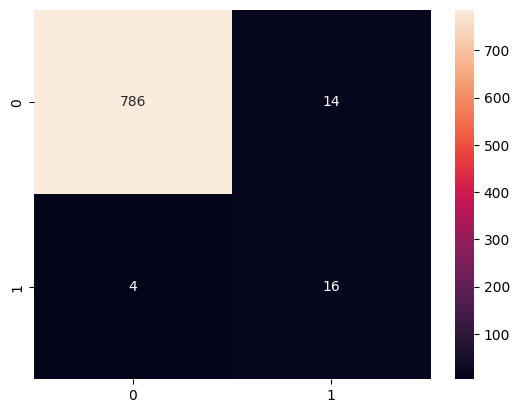

In [91]:
# Confusion Matrix
y_pred = best_rf.predict(X_test_selected)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

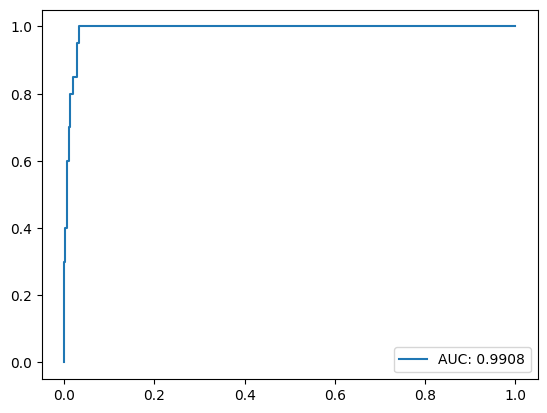

In [92]:
auc_score = roc_auc_score(y_test, best_rf.predict_proba(X_test_selected)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test_selected)[:, 1])
plt.plot(fpr, tpr, label=f'AUC: {auc_score:.4f}')
plt.legend()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'price_mean'),
  Text(1, 0, 'daily_return_mean'),
  Text(2, 0, 'volume_24h_mean'),
  Text(3, 0, 'market_cap_mean'),
  Text(4, 0, 'rank_mean')])

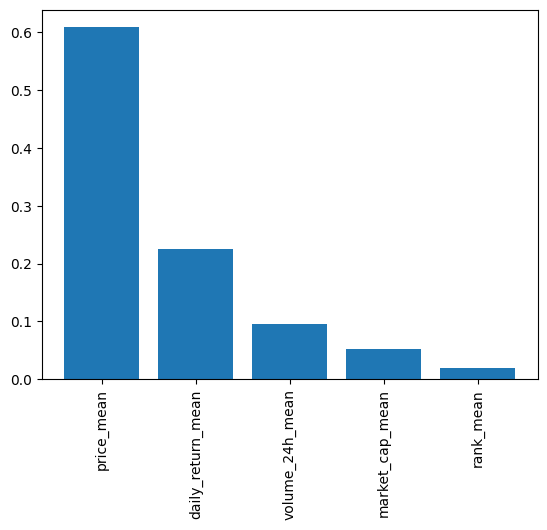

In [93]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(X_train.columns[selector.get_support()][indices], importances[indices])
plt.xticks(rotation=90)
